# Investigating the Equation

Collate the data

In [4]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, hvc_snapshot as snap, collation_tools as ct

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms_craig_annulus","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

#collated_data["RMs"].info()

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


In [5]:
from matplotlib import pyplot as plt

RMs = ct.add_interpolations(collated_data["RMs"], interpolation_pre=collated_data["interpolation"]['interpolation'], interpolation_std=collated_data["interpolation"]['error'], save_file="../data_processed/proc_rms_craig_annulus")

=== COLLATING INTERPOLATION ===
Calculating interpolations


Adding interpolations
Saving RMs to ../data_processed/proc_rms_craig_annulus
Process complete


In [3]:
ct.add_HI_emission(collated_data["RMs"], collated_data["HI"], save_file="../data_processed/proc_rms_craig_annulus")

=== COLLATING HI EMISSION ===
Calculating HI Emission
Adding interpolations
Saving RMs to ../data_processed/proc_rms_craig_annulus
Process complete


In [3]:
from synthesis import hvc_looper as hvcl

#hvcl.save_HVC_RMs(collated_data)
hvcl.add_magnetic_field_RMs(collated_data)

=== CALCULATING HVC MAGNETIC FIELDS ===
Calculating HVC data
Process complete


[<Table length=1053>
               ra_dec_obj               ...  B_virtual_unc [int]  
                deg,deg                 ...           G           
                SkyCoord                ...        float64        
 -------------------------------------- ... ----------------------
   317.02777111652887,-7.24338741441083 ... 1.6198231584449105e-06
 317.30868521376794,-10.661769810309226 ... 1.5653435366188791e-06
  317.3339842965836,-10.677342394940084 ... 1.5627009659085562e-06
  317.3129883922583,-10.665763905351616 ...  1.567070236719616e-06
  317.3304748842112,-10.676834155243764 ...  1.563554072708538e-06
 318.32293692014645,-11.216373477775408 ... 1.4470421669496081e-06
 317.48672476954386,-10.444277766016116 ...  1.603941644332434e-06
   319.9313354653672,-9.022966372671839 ...  1.438686314903196e-06
 316.98678582830456,-10.381840819803234 ... 1.5817725451922975e-06
                                    ... ...                    ...
  315.4382021502972,-11.121085225496513 .

## Determining how to calculate weighted means

First, select one HVC and snapshot

In [ ]:
collated_data.keys()

dict_keys(['RMs', 'HVCs', 'HI', 'H-alpha', 'interpolation'])

In [ ]:
index = 6
hvc = snap.take_snapshot(index, collated_data["RMs"], collated_data["HVCs"], collated_data["HI"], collated_data["H-alpha"], collated_data["interpolation"])

=== HVC SNAPSHOT ===
Gathering data ...
Cropping H-alpha
Cropping HI
Cropping interpolation
Filtering RMs
583 RM grid points found
Snipping complete


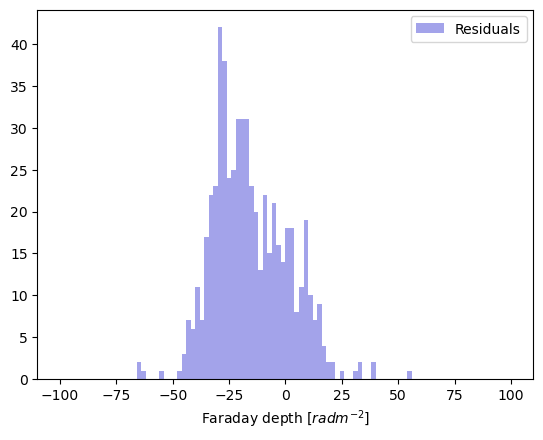

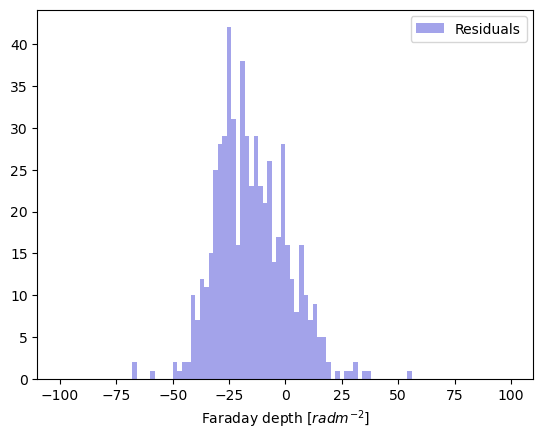

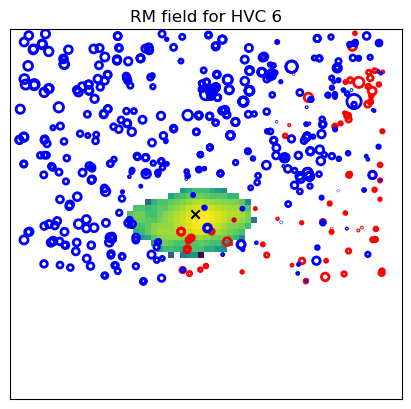

In [ ]:
import numpy as np
from plotting import honours_plot as hplt

hplt.plot_RM_histogram_single(hvc["RMs"]["RM"], hvc["RMs"]["interpolation_raw"])
hplt.plot_RM_histogram_single(hvc["RMs"]["RM"], hvc["RMs"]["interpolation_cor"])

rm_overlay = np.array([
    hvc["RMs"]["pixel location x"],
    hvc["RMs"]["pixel location y"],
    hvc["RMs"]["RM"]-hvc["RMs"]["interpolation_cor"]
    ])
hplt.plot_fits_RM_overlay(rm_overlay, hvc["HI"], show=True, index=index, pixel_corners=hvc["HI_pixel_corners"])